Bootstrap (valid draws):   0%|          | 0/100 [00:00<?, ?draw/s]

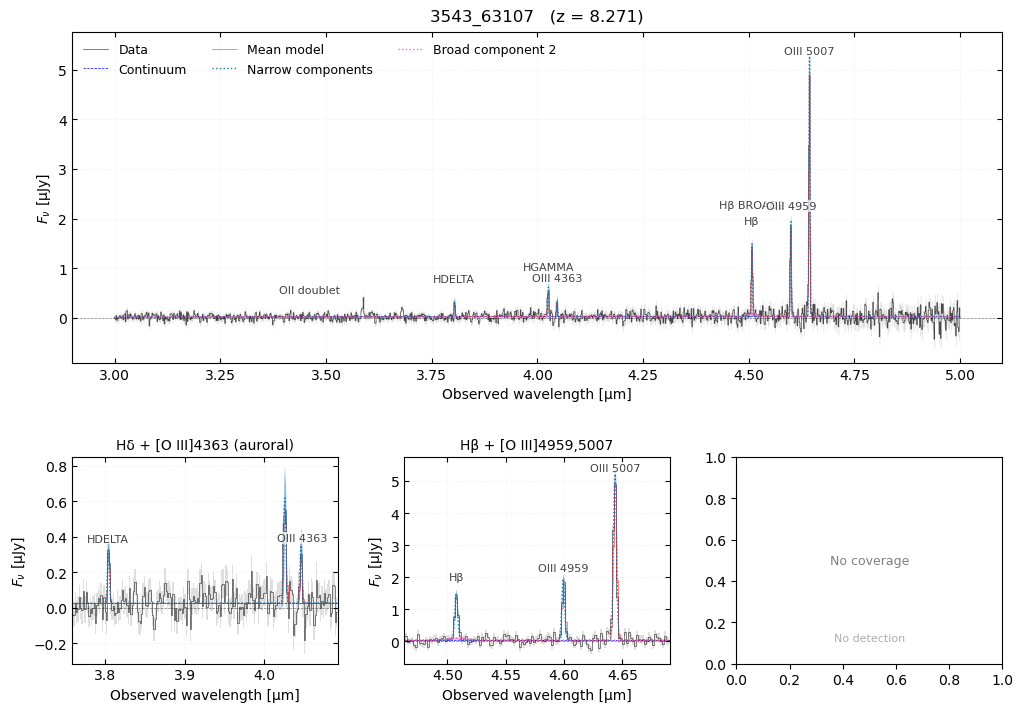


=== MODEL SELECTION (BIC Scores) ===

H-beta:
  Narrow only                      : BIC = 379.40
  Narrow + medium broad            : BIC = 390.10
  Narrow + medium + very broad     : BIC = 281.90
  Narrow + very broad only         : BIC = 266.38
  → Selected: Hβ: narrow + very broad

H-delta:
  Narrow only                      : BIC = 390.50
  → Selected: Hδ: narrow only


=== BOOTSTRAP SUMMARY (value ± error) ===
Line               F_line [erg/s/cm²]          EW₀ [Å]        σ_A [Å]        μ_obs [Å]    SNR_int   SNR_peak(data)    SNR_peak(model)
-----------------------------------------------------------------------------------------------------------------------------
OII_doublet      6.998e-20 ± 4.478e-20     8.88 ± 15.37  22.02 ± 14.28   34593.5 ± 34.4 1.09 ± 0.56      1.33 ± 0.54        0.61 ± 0.92
HDELTA          1.938e-19 ± 3.793e-20    39.53 ± 10.14   10.69 ± 0.34    38040.2 ± 5.4 3.69 ± 0.71      3.02 ± 0.63        3.45 ± 0.67
HGAMMA          3.757e-19 ± 5.767e-20    78.43 ± 1

In [3]:
from astropy.io import fits
import numpy as np
# NOTE: keep the same import path you used before
from PyRSR.broad_line_fit import broad_fit, print_bootstrap_line_table_broad

# ---------- Load + crop ----------
specfile = "../../data/excels-uds04-v4_g395m-f290lp_3543_63107.spec.fits"
with fits.open(specfile) as hdul:
    t = hdul["SPEC1D"].data
    lam = np.asarray(t["wave"])
    fnu = np.asarray(t["flux"])
    enu = np.asarray(t["err"])

target_msaid = "3543_63107"

mask = (lam >= 3.0) & (lam <= 5.0)
spec = dict(lam=lam[mask], flux=fnu[mask], err=enu[mask])

z = 8.271

boot = broad_fit(
    source=spec,    
    z=z,
    grating="G395M",
    source_id=target_msaid,
    n_boot=100,
    lyman_cut=None,
    deg=2,
    plot_continuum_subtracted = False,
    random_state=21,
    continuum_windows=None,
    plot=True,           
    show_progress=True,  
    save_path=None,
    lines_to_use=None,
    broad_mode="auto",
    verbose=False

)

print_bootstrap_line_table_broad(boot)


## cythonised verions - quicker!

Bootstrap (valid draws):   0%|          | 0/100 [00:00<?, ?draw/s]

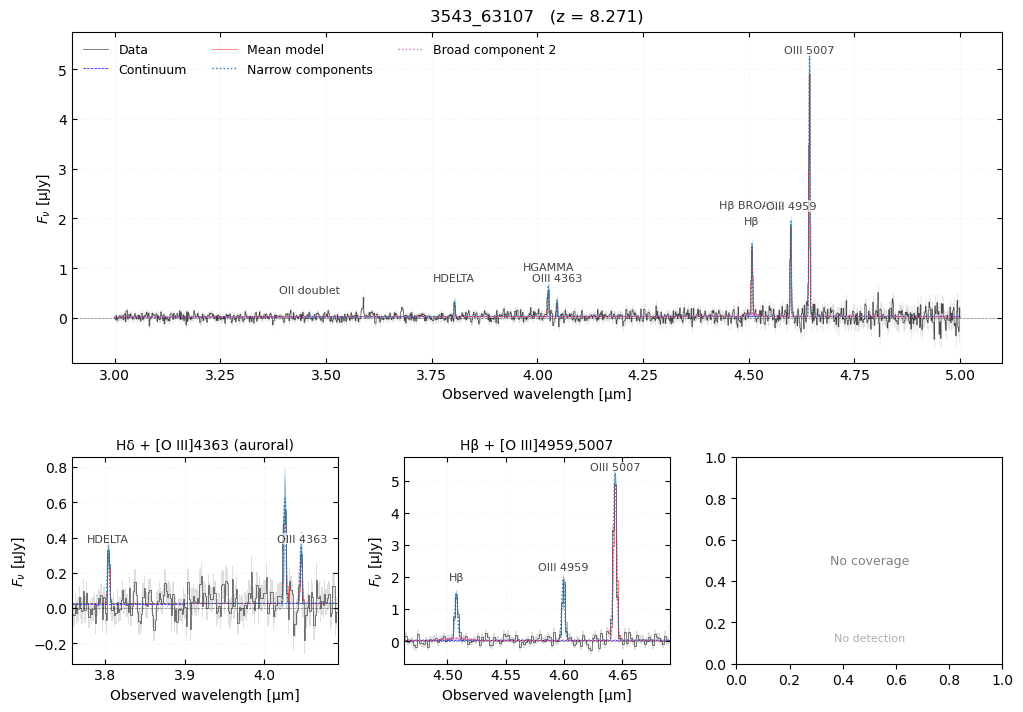


=== MODEL SELECTION (BIC Scores) ===

H-beta:
  Narrow only                      : BIC = 379.40
  Narrow + medium broad            : BIC = 390.10
  Narrow + medium + very broad     : BIC = 281.89
  Narrow + very broad only         : BIC = 266.38
  → Selected: Hβ: narrow + very broad

H-delta:
  Narrow only                      : BIC = 390.50
  → Selected: Hδ: narrow only


=== BOOTSTRAP SUMMARY (value ± error) ===
Line               F_line [erg/s/cm²]          EW₀ [Å]        σ_A [Å]        μ_obs [Å]    SNR_int   SNR_peak(data)    SNR_peak(model)
-----------------------------------------------------------------------------------------------------------------------------
OII_doublet      7.163e-20 ± 4.618e-20     9.94 ± 15.12  23.47 ± 14.19   34591.7 ± 34.3 1.09 ± 0.61      1.37 ± 0.49        0.65 ± 0.77
HDELTA          1.948e-19 ± 3.843e-20    39.76 ± 10.41   10.70 ± 0.32    38040.1 ± 5.4 3.71 ± 0.73      3.00 ± 0.59        3.47 ± 0.67
HGAMMA          3.767e-19 ± 5.705e-20    79.32 ± 1

In [4]:
from astropy.io import fits
import numpy as np
# NOTE: keep the same import path you used before
from PyRSRX.broad_line_fit import broad_fit, print_bootstrap_line_table_broad

# ---------- Load + crop ----------
specfile = "../../data/excels-uds04-v4_g395m-f290lp_3543_63107.spec.fits"
with fits.open(specfile) as hdul:
    t = hdul["SPEC1D"].data
    lam = np.asarray(t["wave"])
    fnu = np.asarray(t["flux"])
    enu = np.asarray(t["err"])

target_msaid = "3543_63107"

mask = (lam >= 3.0) & (lam <= 5.0)
spec = dict(lam=lam[mask], flux=fnu[mask], err=enu[mask])

z = 8.271

boot = broad_fit(
    source=spec,    
    z=z,
    grating="G395M",
    source_id=target_msaid,
    n_boot=100,
    lyman_cut=None,
    deg=2,
    plot_continuum_subtracted = False,
    random_state=21,
    continuum_windows=None,
    plot=True,           
    show_progress=True,  
    save_path=None,
    lines_to_use=None,
    broad_mode="auto",
    verbose=False

)

print_bootstrap_line_table_broad(boot)


  [Weighting] Increasing weight for NII_6549 (factor 9) on 5 pixels.
  [Weighting] Increasing weight for NII_6585 (factor 9) on 5 pixels.
  [Constraints] Tying NII_6549 to NII_6585 (Flux ratio 2.96, tied kinematics).
Fit with lines=['NII_6549', 'H⍺', 'NII_6585']: χ²=2007.84, k=6, BIC=2037.45
  [Weighting] Increasing weight for NII_6549 (factor 9) on 5 pixels.
  [Weighting] Increasing weight for NII_6585 (factor 9) on 5 pixels.
  [Constraints] Tying NII_6549 to NII_6585 (Flux ratio 2.96, tied kinematics).
Fit with lines=['NII_6549', 'H⍺', 'NII_6585', 'H⍺_BROAD']: χ²=263.64, k=9, BIC=308.05
  [Weighting] Increasing weight for NII_6549 (factor 9) on 5 pixels.
  [Weighting] Increasing weight for NII_6585 (factor 9) on 5 pixels.
  [Constraints] Tying NII_6549 to NII_6585 (Flux ratio 2.96, tied kinematics).
Fit with lines=['NII_6549', 'H⍺', 'NII_6585', 'H⍺_BROAD', 'H⍺_BROAD2']: χ²=7091.01, k=12, BIC=7150.22
  -> 2-broad Hα rejected (negative H⍺_BROAD: -4.17e-17)
  [Weighting] Increasing weig

Bootstrap (valid draws):   0%|          | 0/200 [00:00<?, ?draw/s]


FLUX DIAGNOSTIC: Hα Region

Component fluxes in Hα region (4.5485 - 4.7868 µm):
  NII_6549       : 3.174e-19 erg/s/cm²
  H⍺             : 3.183e-17 erg/s/cm²
  NII_6585       : 9.395e-19 erg/s/cm²
  H⍺_BROAD       : 1.724e-17 erg/s/cm²

Total (sum of components)     : 5.033e-17 erg/s/cm²
Total (integrated model)      : 5.060e-17 erg/s/cm²
Ratio (components/model)      : 0.9946
Discrepancy                   : -0.54%



/Users/raunaqrai/miniforge3/envs/jwst/lib/python3.12/site-packages/PyRSR/broad_line_fit.py:3602: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


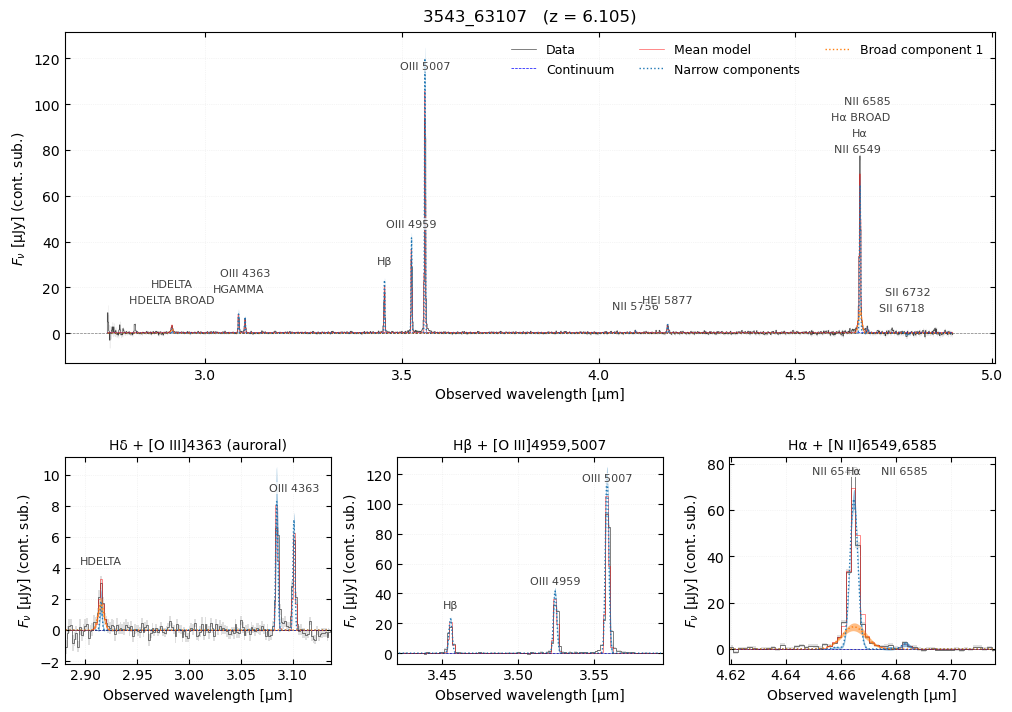


=== MODEL SELECTION (BIC Scores) ===

H-alpha:
  Narrow only                      : BIC = 2037.45
  Narrow + medium broad            : BIC = 308.05
  Narrow + very broad only         : BIC = 788.98
  → Selected: Hα: narrow + medium broad

H-beta:
  Narrow only                      : BIC = 545.36
  Narrow + medium broad            : BIC = 3434.05
  Narrow + medium + very broad     : BIC = 3450.65
  Narrow + very broad only         : BIC = 573.41
  → Selected: Hβ: narrow only

H-delta:
  Narrow only                      : BIC = 677.81
  Narrow + medium broad            : BIC = 637.79
  Narrow + very broad only         : BIC = 669.74
  → Selected: Hδ: narrow + medium broad


=== BOOTSTRAP SUMMARY (value ± error) ===
Line               F_line [erg/s/cm²]          EW₀ [Å]        σ_A [Å]        μ_obs [Å]    SNR_int   SNR_peak(data)    SNR_peak(model)
-----------------------------------------------------------------------------------------------------------------------------
HDELTA          

In [2]:
from astropy.io import fits
import numpy as np
from PyRSR.broad_line_fit import broad_fit, print_bootstrap_line_table_broad



# ---------- Load + crop ----------
specfile = "../../data/stark-rxcj2248-v4_g395m-f290lp_2478_3.spec.fits"
with fits.open(specfile) as hdul:
    t = hdul["SPEC1D"].data
    lam = np.asarray(t["wave"])
    fnu = np.asarray(t["flux"])
    enu = np.asarray(t["err"])

target_msaid = "3543_63107"

mask = (lam >= 2.75) & (lam <= 5)
spec = dict(lam=lam[mask], flux=fnu[mask], err=enu[mask])

z = 6.1052


boot = broad_fit(
    source=spec,    
    z=z,
    grating="G395M",
    source_id=target_msaid,
    n_boot=200,
    lyman_cut=None,
    deg=2,
    random_state=21,
    continuum_windows=None,
    plot=True,           
    show_progress=True,   
    save_path=None,
    lines_to_use=None,
    plot_continuum_subtracted = True,
    broad_mode="auto",
    verbose=True,
    plot_unit='fnu',
)

print_bootstrap_line_table_broad(boot)

# cythonised: quicker!

  [Weighting] Increasing weight for NII_6549 (factor 9) on 5 pixels.
  [Weighting] Increasing weight for NII_6585 (factor 9) on 5 pixels.
  [Constraints] Tying NII_6549 to NII_6585 (Flux ratio 2.96, tied kinematics).
Fit with lines=['NII_6549', 'H⍺', 'NII_6585']: χ²=2075.93, k=6, BIC=2105.53
  [Weighting] Increasing weight for NII_6549 (factor 9) on 5 pixels.
  [Weighting] Increasing weight for NII_6585 (factor 9) on 5 pixels.
  [Constraints] Tying NII_6549 to NII_6585 (Flux ratio 2.96, tied kinematics).
Fit with lines=['NII_6549', 'H⍺', 'NII_6585', 'H⍺_BROAD']: χ²=474.33, k=9, BIC=518.74
  [Weighting] Increasing weight for NII_6549 (factor 9) on 5 pixels.
  [Weighting] Increasing weight for NII_6585 (factor 9) on 5 pixels.
  [Constraints] Tying NII_6549 to NII_6585 (Flux ratio 2.96, tied kinematics).
Fit with lines=['NII_6549', 'H⍺', 'NII_6585', 'H⍺_BROAD', 'H⍺_BROAD2']: χ²=2358.50, k=12, BIC=2417.72
  -> 2-broad Hα rejected (negative H⍺_BROAD: -1.10e-17)
  [Weighting] Increasing weig

Bootstrap (valid draws):   0%|          | 0/200 [00:00<?, ?draw/s]


FLUX DIAGNOSTIC: Hα Region

Component fluxes in Hα region (4.5485 - 4.7868 µm):
  NII_6549       : 5.041e-19 erg/s/cm²
  H⍺             : 3.248e-17 erg/s/cm²
  NII_6585       : 1.492e-18 erg/s/cm²
  H⍺_BROAD       : 1.246e-17 erg/s/cm²

Total (sum of components)     : 4.694e-17 erg/s/cm²
Total (integrated model)      : 4.662e-17 erg/s/cm²
Ratio (components/model)      : 1.0069
Discrepancy                   : +0.69%



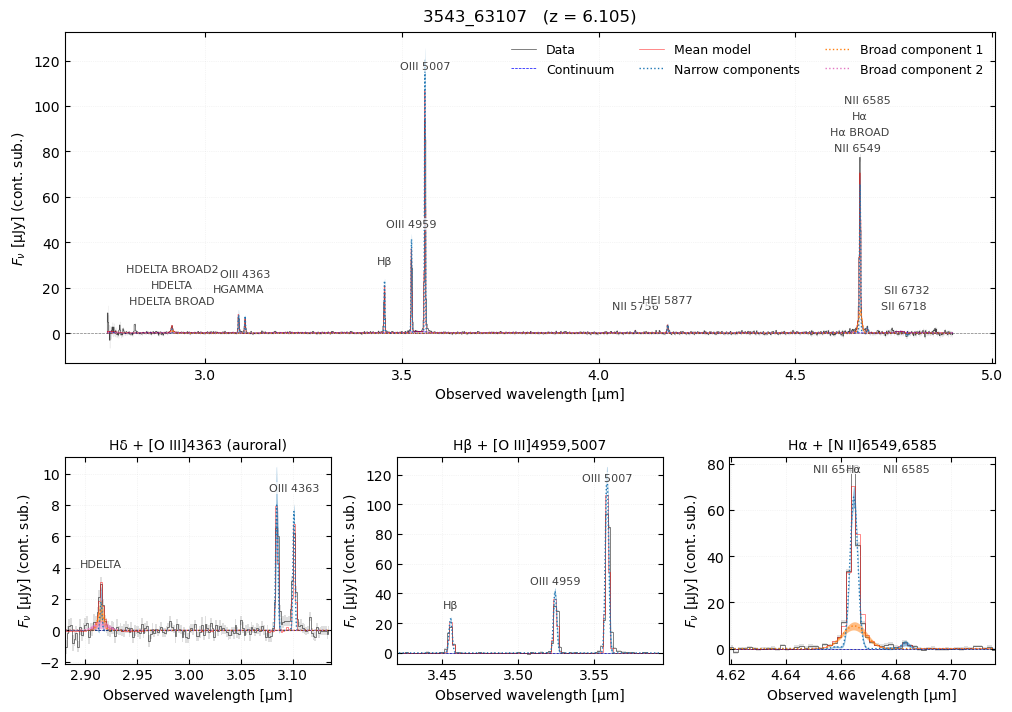


=== MODEL SELECTION (BIC Scores) ===

H-alpha:
  Narrow only                      : BIC = 2105.53
  Narrow + medium broad            : BIC = 518.74
  Narrow + very broad only         : BIC = 966.40
  → Selected: Hα: narrow + medium broad

H-beta:
  Narrow only                      : BIC = 431.07
  Narrow + medium broad            : BIC = 3415.75
  Narrow + medium + very broad     : BIC = 666.84
  Narrow + very broad only         : BIC = 3565.99
  → Selected: Hβ: narrow only

H-delta:
  Narrow only                      : BIC = 730.21
  Narrow + medium broad            : BIC = 716.98
  Narrow + medium + very broad     : BIC = 702.34
  Narrow + very broad only         : BIC = 724.25
  → Selected: Hδ: narrow + medium + very broad


=== BOOTSTRAP SUMMARY (value ± error) ===
Line               F_line [erg/s/cm²]          EW₀ [Å]        σ_A [Å]        μ_obs [Å]    SNR_int   SNR_peak(data)    SNR_peak(model)
-------------------------------------------------------------------------------------

In [2]:
from astropy.io import fits
import numpy as np
from PyRSRX.broad_line_fit import broad_fit, print_bootstrap_line_table_broad



# ---------- Load + crop ----------
specfile = "../../data/stark-rxcj2248-v4_g395m-f290lp_2478_3.spec.fits"
with fits.open(specfile) as hdul:
    t = hdul["SPEC1D"].data
    lam = np.asarray(t["wave"])
    fnu = np.asarray(t["flux"])
    enu = np.asarray(t["err"])

target_msaid = "3543_63107"

mask = (lam >= 2.75) & (lam <= 5)
spec = dict(lam=lam[mask], flux=fnu[mask], err=enu[mask])

z = 6.1052


boot = broad_fit(
    source=spec,    
    z=z,
    grating="G395M",
    source_id=target_msaid,
    n_boot=200,
    lyman_cut=None,
    random_state=21,
    continuum_windows=None,
    plot=True,           
    show_progress=True,   
    save_path=None,
    lines_to_use=None,
    fit_window_um=None,
    plot_continuum_subtracted = True,
    broad_mode="auto",
    verbose=True,
    plot_unit='fnu',
    continuum_fit="moving_average",
    continuum_movavg_window_um=0.05,
)

print_bootstrap_line_table_broad(boot)